In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("train.csv")
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y=data['label']
X=data.drop("label",axis=1)
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


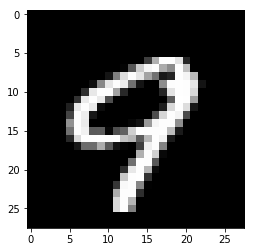

In [11]:
#check data and label in 100th index
grid_data=X.iloc[100].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()

In [12]:
y[100]

9

In [15]:
#do a pca of 784 dimension
#do standarization
from sklearn.preprocessing import StandardScaler
stan_data=StandardScaler().fit_transform(X)
print(stan_data.shape)


(42000, 784)


In [17]:
sample_data=stan_data
#calculate covariance matrix
covar_matrix=np.matmul(sample_data.T,sample_data)
print('covariance mat dimension',covar_matrix.shape)

covariance mat dimension (784, 784)


In [19]:
#find 2 max eigen values and eigen vector
from scipy.linalg import eigh
#eigenvalues are 0,1,2,...783 for 784*784 dimension
values,vector=eigh(covar_matrix,eigvals=(782,783))
print('shape of eigenvec'+str(vector.shape))

shape of eigenvec(784, 2)


In [20]:
#convert eigen vec to 2*784
vector=vector.T
print('shape of eigenvec'+str(vector.shape))

shape of eigenvec(2, 784)


In [25]:
#now transform the sample data of dim 42000,784 to new dimension 2,784 i.e transforming to new dimension by matrix multiplication
new_coor=np.matmul(vector,sample_data.T)
print('new cocoordinate'+str(new_coor.shape))

new cocoordinate(2, 42000)


In [27]:
#plot in new dimension add new coordinate with label(0-9)
new_coor=np.vstack((new_coor,y)).T
new_coor

array([[ -5.2264454 ,  -5.14047772,   1.        ],
       [  6.03299601,  19.29233234,   0.        ],
       [ -1.70581328,  -7.64450341,   1.        ],
       ..., 
       [  7.07627667,   0.49539137,   7.        ],
       [ -4.34451279,   2.30724011,   6.        ],
       [  1.55912058,  -4.80767022,   9.        ]])

In [30]:
dataframe=pd.DataFrame(new_coor,columns=("1st PCA","2nd PCA","Label"))
print(dataframe.head(5))

    1st PCA    2nd PCA  Label
0 -5.226445  -5.140478    1.0
1  6.032996  19.292332    0.0
2 -1.705813  -7.644503    1.0
3  5.836139  -0.474207    4.0
4  6.024818  26.559574    0.0


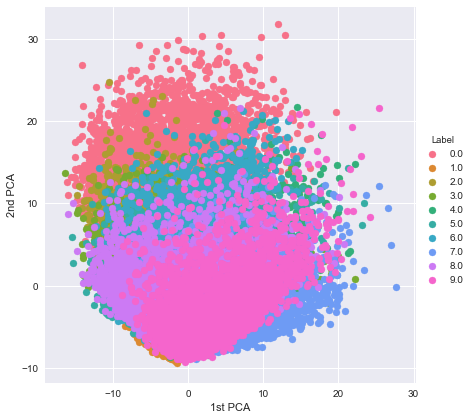

In [33]:
#plot
sns.FacetGrid(dataframe,hue="Label",size=6).map(plt.scatter,"1st PCA","2nd PCA").add_legend()
plt.show()

In [42]:
#use module pca
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
percent_variance_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
print('% explained',percent_variance_explained)
cumulative_sum=np.cumsum(percent_variance_explained)
print('% cumltive sum explained',cumulative_sum)


% explained [ 0.58297776  0.41702224]
% cumltive sum explained [ 0.58297776  1.        ]


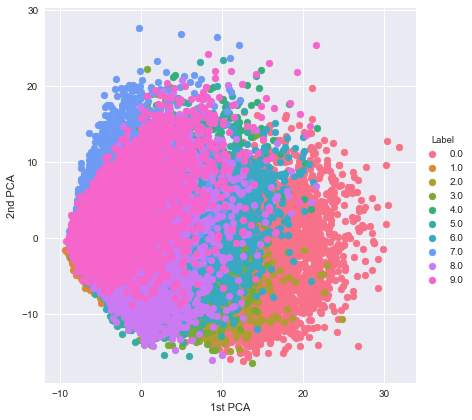

In [37]:
pca_data=np.vstack((pca_data.T,y)).T
dataframe=pd.DataFrame(data=pca_data,columns=("1st PCA","2nd PCA","Label"))
sns.FacetGrid(dataframe,hue="Label",size=6).map(plt.scatter,"1st PCA","2nd PCA").add_legend()
plt.show()


In [ ]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=784
pca_data=pca.fit_transform(sample_data)
percent_variance_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cumulative_sum=np.cumsum(percent_variance_explained)
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cumulative_sum,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_component')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#use t-SNE
from sklearn.manifold import TSNE
#n_componets=2 means convert to 2D, and use 10 points as near points, 2 iteration
stan_data_1000=stan_data[0:1000,]
y_1000=y[0:1000,]
model=TSNE(n_components=2,random_state=0,perplexity=10,n_iter=2)
tsne_data=model.fit_transform(stan_data_1000)
#create new data for plotting
tsne_data=np.vstack((tsne_data.T,y_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dim1','Dim2','Label'))
sn.FacetGrid(tsne_df,hue='Label',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.show()
#need to try different value to understand best one